# Week 8 assignment: NLP on social media data

Take our social media we collected last week and:

- extract the sentiment scores of the titles of the posts
    - you can use the keyword method, Python packages, or other methods to extract the sentiment scores
- plot a histogram of the sentiment scores
- look at descriptive statistics (mean, median, standard deviation) of the sentiment scores
- examine the text for some of the highest and lowest sentiment scores
- write a short analysis of the results and our process, as well as propose one idea for something we could use this data for

Optional advanced challenges:
- Compare different sentiment analysis methods (e.g. textblob and VADER). Does one seem to work better than another?
- Get the sentiments of the comments for each post. We can do a lot with this, such as:
    - look at the average sentiment for each post and compare it with the sentiment of the title and/or text
    - look at the distribution of sentiments for each post and find the posts with the widest range of sentiments (controversial posts)
- Examine the subjectivity of our data (e.g. using textblob)
- Use topic modeling on the posts
    - you can also add in the comments to the topic model
- Look at the most frequent words for positive and negative sentiment posts

Note: There is no assignment solution file for this week.

In [2]:
import sqlite3
import pandas as pd

con = sqlite3.connect('co_reddit_next.sqlite')
df = pd.read_sql_query('SELECT * from posts;', con)
con.close()
df

,index,title,link,author,n_comments,score,text,id
0,0,"Red Rocks, 1974 John Denver concert",/r/Colorado/comments/mug406/red_rocks_1974_joh...,Mellotime,1,28,,mug406
1,1,Hiking the Royal Gorge in a spring snowstorm,/r/Colorado/comments/muffdl/hiking_the_royal_g...,TaipeiPersonality_,1,19,,muffdl
2,2,Rocky Mountain National Park this weekend!,/r/Colorado/comments/mufe4j/rocky_mountain_nat...,TaipeiPersonality_,2,19,,mufe4j
3,3,Milky way at Loveland Pass last weekend,/r/Colorado/comments/mud617/milky_way_at_lovel...,Sutitan,35,692,,mud617
4,4,Weminuche Wilderness,/r/Colorado/comments/mu835a/weminuche_wilderness/,finerminer17,13,189,,mu835a
...,...,...,...,...,...,...,...,...
912,912,Hoarfrost on one of my sundials this brisk mor...,/r/Colorado/comments/kcnpj5/hoarfrost_on_one_o...,IronRainForge,5,78,,kcnpj5
913,913,The Stanley Hotel after some snow,/r/Colorado/comments/kclire/the_stanley_hotel_...,TFG4,9,251,,kclire
914,914,The stanley hotel in Estes in October,/r/Colorado/comments/kclfwi/the_stanley_hotel_...,TFG4,1,44,,kclfwi
915,915,Picture my dad took - Sawatch Range just SW of...,/r/Colorado/comments/kckwut/picture_my_dad_too...,theredcameron,6,95,,kckwut


In [7]:
sentiment_df = pd.read_csv('AFINN-en-165.txt', sep='\t', names=['word', 'scores'], index_col='word')

In [8]:
sentiment_df

,scores
word,
abandon,-2
abandoned,-2
abandons,-2
abducted,-2
abduction,-2
...,...
yucky,-2
yummy,3
zealot,-2


In [10]:
sentiment_dict = sentiment_df.to_dict()['scores']

In [11]:
import numpy as np

title_sentiments = []
for title in df['title']:
    words = title.lower().split()
    this_titles_sentiments = []
    for w in words:
        if w in sentiment_dict.keys():
            this_titles_sentiments.append(sentiment_dict[w])
        else:
            this_titles_sentiments.append(0)
            
    
    title_sentiments.append(np.mean(this_titles_sentiments))

In [12]:
df['keyword_sentiment'] = title_sentiments

<Axes: ylabel='Frequency'>

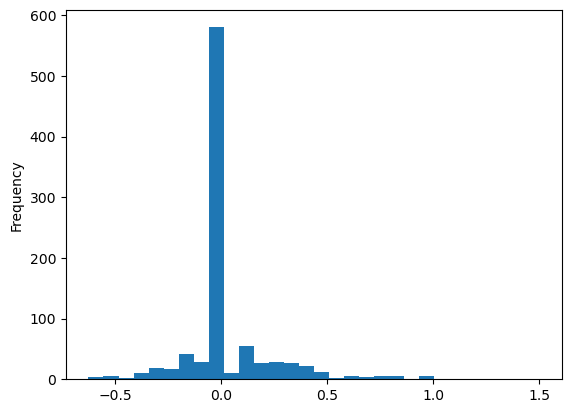

In [13]:
df['keyword_sentiment'].plot.hist(bins=30)

In [14]:
df['keyword_sentiment'].mean()

0.0412800450004885

In [15]:
df['keyword_sentiment'].median()

0.0

In [16]:
df['keyword_sentiment'].std()

0.21043836291116932

In [17]:
df.sort_values(by='keyword_sentiment')[['title', 'keyword_sentiment']]

,title,keyword_sentiment
181,Colorado judge strikes down Boulder’s assault ...,-0.625000
508,Arrests made in deadly Green Valley Ranch arson,-0.625000
635,"7 Injured, 1 Killed In Berthoud Pass Head-On C...",-0.555556
52,"9News, Parent Company Accused of Racist Behavi...",-0.500000
105,Animal cruelty initiative irks Colorado ranchers,-0.500000
...,...,...
780,Good morning Colorado!,1.000000
860,Colorados beautiful nature,1.000000
380,Great White Buffalo,1.000000
738,Love the beautiful snowy Rockies!,1.200000


# Summary

What was done here was simple. The content is nearly the same from my statistics class from undergraduate. I believe there are a lot of things that can be done with this data; however, I am not entirely aware of the business possibilities. Of course, there are many use cases, and something that I can think of is the standard deviation and how the data engineer can determine how spread out or compact the data is. In certain cases, perhaps at Amazon, this could me content that is displayed for certain users to purchase. As this is not the example, it is something where with similar data it can be used. I still enjoyed the week 7 assingment more, but the keyword sentiment was nice to understand and evalute.